# ML Foundations hw1 - Coursera

## PLA

In [1]:
import numpy as np

In [2]:
raw_data = np.loadtxt('hw1_15_train.dat')

In [3]:
X = raw_data[:, :4]
y = raw_data[:, -1]
print('shape of X:', X.shape)
print('shape of y:', y.shape)

shape of X: (400, 4)
shape of y: (400,)


### add $x_0 = 1$ to each $x_n$


In [4]:
X = np.insert(X, 0, 1, axis=1)
print('shape of X:', X.shape)

shape of X: (400, 5)


In [5]:
def PLA(X, y):
    W = np.zeros(X.shape[1]) # W = 0
    update_cnt = 0
    done = False
    
    while not done:
        done = True
        for i in range(len(X)):
            sign = np.sign(np.dot(W, X[i]))
            if sign == 0:
                sign = -1
            
            if sign != y[i]:
                W = W + y[i] * X[i]
                update_cnt = update_cnt + 1
                done = False
    return W, update_cnt

### 15.

In [6]:
W, update_cnt = PLA(X, y)
print('Total number of updates:', update_cnt)

Total number of updates: 45


### 16.

In [7]:
total_update_cnt = 0
for i in range(2000):
    s = np.arange(X.shape[0])
    np.random.shuffle(s)
    X_rand = X[s]
    y_rand = y[s]
    W, update_cnt = PLA(X_rand, y_rand)
    total_update_cnt = total_update_cnt + update_cnt
print('Average number of updates:', total_update_cnt/2000)

Average number of updates: 40.0285


### 17.

In [8]:
def PLA_eta(X, y, eta):
    W = np.zeros(X.shape[1]) # W = 0
    update_cnt = 0
    done = False
    
    while not done:
        done = True
        for i in range(len(X)):
            done = True
            sign = np.sign(np.dot(W, X[i]))
            if sign == 0:
                sign = -1
            
            if sign != y[i]:
                W = W + eta * y[i] * X[i]
                update_cnt = update_cnt + 1
                done = False
    
    return W, update_cnt

In [9]:
total_update_cnt = 0
for i in range(2000):
    s = np.arange(X.shape[0])
    np.random.shuffle(s)
    X_rand = X[s]
    y_rand = y[s]
    W, update_cnt = PLA_eta(X_rand, y_rand, 0.5)
    total_update_cnt = total_update_cnt + update_cnt
print('Average number of updates:', total_update_cnt/2000)

Average number of updates: 34.102


## Pocket Algorithm

### 18.

In [10]:
train_data = np.loadtxt('hw1_18_train.dat')
test_data = np.loadtxt('hw1_18_test.dat')

In [11]:
X = train_data[:, :4]
y = train_data[:, -1]
print('shape of X:', X.shape)
print('shape of y:', y.shape)

shape of X: (500, 4)
shape of y: (500,)


In [12]:
X_test = test_data[:, :4]
y_test = test_data[:, -1]
print('shape of X_test:', X_test.shape)
print('shape of y_test:', y_test.shape)

shape of X_test: (500, 4)
shape of y_test: (500,)


### add $x_0 = 1$ to each $x_n$


In [13]:
X = np.insert(X, 0, 1, axis=1)
print('shape of X:', X.shape)

shape of X: (500, 5)


In [14]:
X_test = np.insert(X_test, 0, 1, axis=1)
print('shape of X_test:', X_test.shape)

shape of X_test: (500, 5)


In [15]:
def PLA_pocket(X, y, update_num):
    W = np.zeros(X.shape[1]) # W = 0
    W_pocket = W
    pocket_error_rate = get_error_rate(W_pocket, X, y)
    i = 0
    update_cnt = 0
    
    while update_cnt < update_num:
        sign = np.sign(np.dot(W, X[i]))
        if sign == 0:
            sign = -1

        if sign != y[i]:
            update_cnt = update_cnt + 1

            W = W + y[i] * X[i]
            error_rate = get_error_rate(W, X, y)
            if error_rate < pocket_error_rate:
                W_pocket = W
                pocket_error_rate = error_rate
        i = (i + 1) % X.shape[0]

    return W_pocket, W

def get_error_rate(W, X, y):
    error_cnt = 0
    
    for i in range(len(X)):
        sign = np.sign(np.dot(W, X[i]))
        if sign == 0:
            sign = -1
        if sign != y[i]:
            error_cnt = error_cnt + 1

    return error_cnt / len(X)

In [16]:
total_error_rate = 0
for i in range(2000):
    s = np.arange(X.shape[0])
    np.random.shuffle(s)
    X_rand = X[s]
    y_rand = y[s]
    W_pocket, W = PLA_pocket(X_rand, y_rand, 50)
    error_rate = get_error_rate(W_pocket, X_rand, y_rand)
    total_error_rate = total_error_rate + error_rate
print('Average error rate:', total_error_rate/2000)

Average error rate: 0.1241239999999999


### 19.

In [17]:
total_error_rate = 0
for i in range(2000):
    s = np.arange(X.shape[0])
    np.random.shuffle(s)
    X_rand = X[s]
    y_rand = y[s]
    W_pocket, W = PLA_pocket(X_rand, y_rand, 50)
    error_rate = get_error_rate(W, X_rand, y_rand)
    total_error_rate = total_error_rate + error_rate
print('Average error rate:', total_error_rate/2000)

Average error rate: 0.3610929999999999


### 20.

In [18]:
total_error_rate = 0
for i in range(2000):
    s = np.arange(X.shape[0])
    np.random.shuffle(s)
    X_rand = X[s]
    y_rand = y[s]
    W_pocket, W = PLA_pocket(X_rand, y_rand, 100)
    error_rate = get_error_rate(W_pocket, X_rand, y_rand)
    total_error_rate = total_error_rate + error_rate
print('Average error rate:', total_error_rate/2000)

Average error rate: 0.10683100000000026


# ML Foundations hw1 - extension

In [19]:
raw_data = np.loadtxt('hw1_7_train.dat')

In [20]:
X = raw_data[:, :4]
y = raw_data[:, -1]
print('shape of X:', X.shape)
print('shape of y:', y.shape)

shape of X: (400, 4)
shape of y: (400,)


### add $x_0 = 1$ to each $x_n$

In [21]:
X = np.insert(X, 0, 1, axis=1)
print('shape of X:', X.shape)

shape of X: (400, 5)


### 7.

In [22]:
import matplotlib.pyplot as plt

In [23]:
total_update_cnt = 0
history = []
for i in range(1126):
    s = np.arange(X.shape[0])
    np.random.shuffle(s)
    X_rand = X[s]
    y_rand = y[s]
    W, update_cnt = PLA(X_rand, y_rand)
    total_update_cnt = total_update_cnt + update_cnt
    history.append(update_cnt)
print('Average number of updates:', total_update_cnt/1126)

Average number of updates: 39.50355239786856


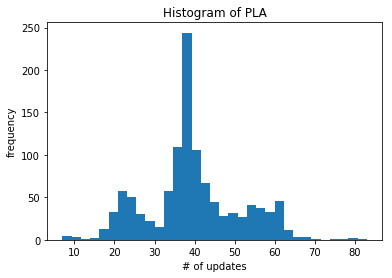

In [24]:
plt.hist(history, bins='auto')
plt.title('Histogram of PLA')
plt.xlabel('# of updates')
plt.ylabel('frequency')
plt.show()